In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2

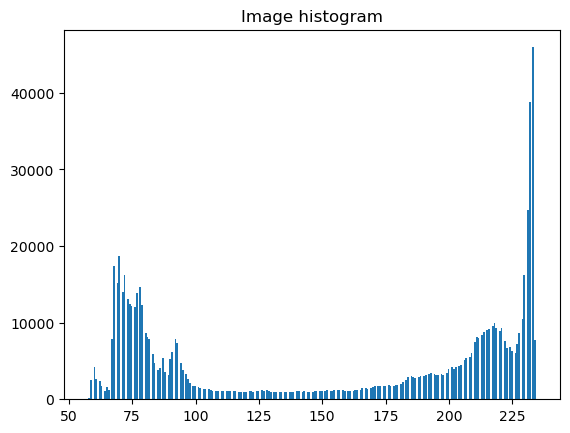

In [2]:
in_dir = "./data/"
im_name = "vertebra.png"

# Read the image.
im_org = io.imread(in_dir + im_name)

#Exercise 1
# Histogram
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

# The histogram is bimodal (two top points)

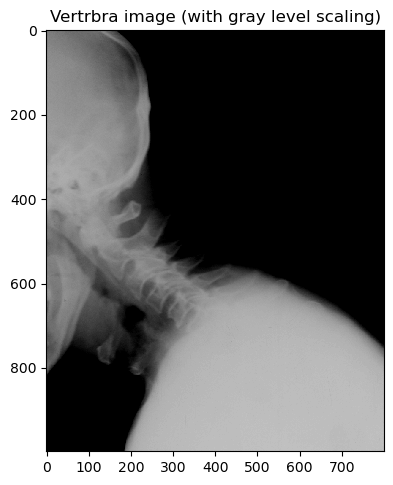

In [3]:
io.imshow(im_org, vmin=170, vmax=255)
plt.title('Vertrbra image (with gray level scaling)')
io.show()


57 235


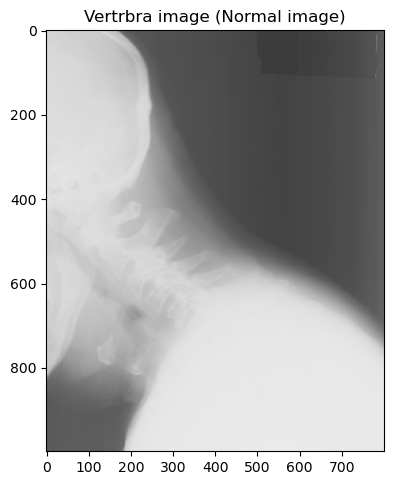

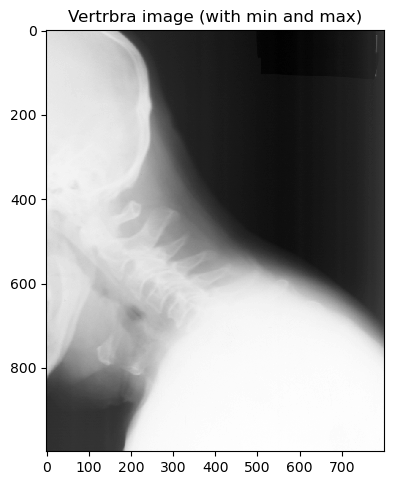

In [4]:
# Exercise 2: Compute the minimum and maximum values of the image. Is the full scale of the gray-scale spectrum used or can we enhance the appearance of the image?
min_val = np.min(im_org)
max_val = np.max(im_org)
print(min_val, max_val)

# min is 57, max is 235 - whole grey scale is not used
# im_org.min(), im_org.max()

io.imshow(im_org, vmin=0, vmax=255)
plt.title('Vertrbra image (Normal image)')
io.show()

io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Vertrbra image (with min and max)')
io.show()


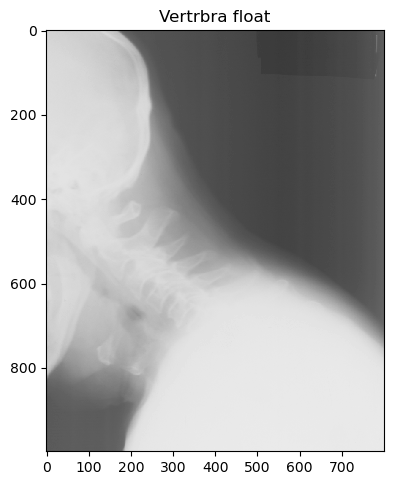

(True, True)

In [5]:
# Exercise 3: Add an import statement to your script:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

float_img = img_as_float(im_org)

io.imshow(float_img)
plt.title('Vertrbra float')
io.show()

np.round(float_img.min()*255) == im_org.min(), float_img.max()*255 == im_org.max()


In [6]:
# Exercise 4: Use img_as_ubyte on the float image you computed in the previous exercise. Compute the Compute the minimum and maximum values of this image. Are they as expected?

uimg = img_as_ubyte(float_img)

uimg.min(), uimg.max()

# Yes - it behaves as expected

(57, 235)

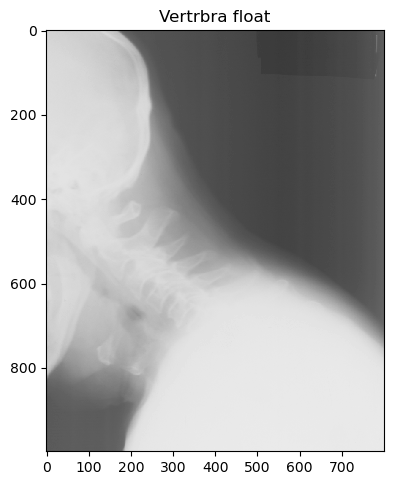

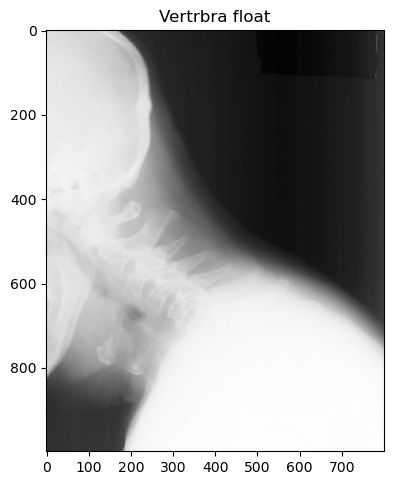

In [7]:
# Exercise 5: Implement a Python function called histogram_stretch. It can, for example, follow this example:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
    
    # Do something here
    img_out = ((max_desired - min_desired)/(max_val - min_val))*(img_float - min_val)+min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

# Exercise 6: Test your histogram_stretch on the vertebra.png image. Show the image before and after the histogram stretching. What changes do you notice in the image? Are the important structures more visible?
io.imshow(im_org)
plt.title('Vertrbra float')
io.show()

io.imshow(histogram_stretch(im_org))
plt.title('Vertrbra float')
io.show()

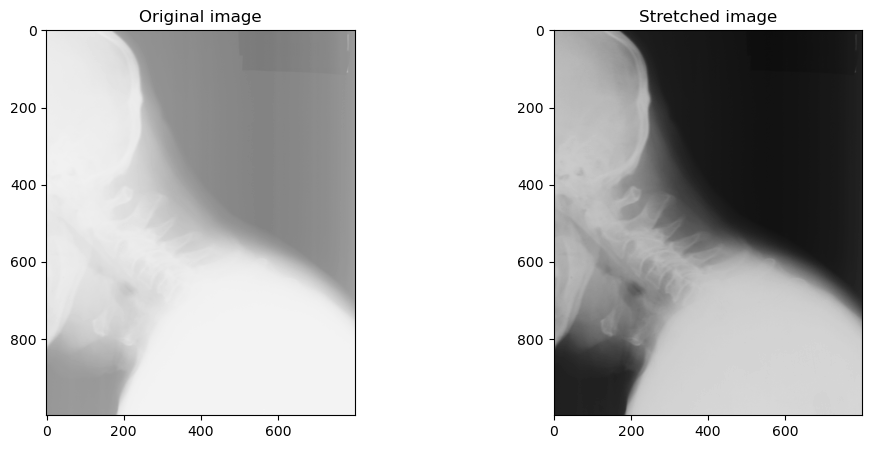

In [8]:
# Exercise 7: Implement a function, gamma_map(img, gamma), that:
def gamma_map(img, gamma):
    float_img = img_as_float(img)
    gamma_map = np.power(float_img, gamma)
    return img_as_ubyte(gamma_map)

# Exercise 8: Test your gamma_map function on the vertebra image or another image of your choice. Try different values of, 
# for example 0.5 and 2.0. Show the resuling image together with the input image. Can you see the differences in the images?
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(gamma_map(im_org, 0.5), cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title('Original image')
ax[1].imshow(gamma_map(im_org, 2), cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Stretched image')
plt.show()

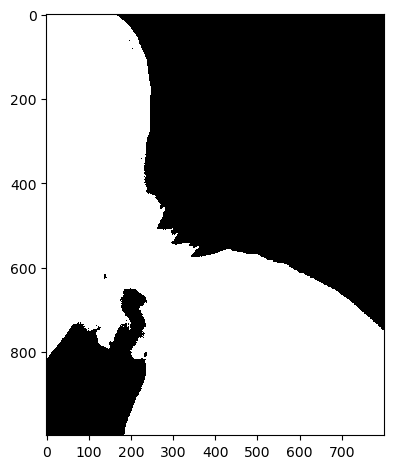

In [9]:
import cv2 as cv

# Exercise 9: Implement a function, threshold_image:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    return img_in > thres

io.imshow(threshold_image(im_org, 178))
io.show()

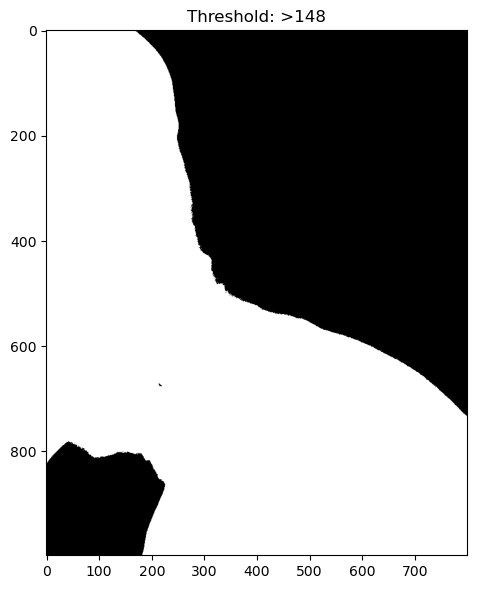

In [10]:
# Exercise 11
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
 
# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))
 
# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(im_org)
bin_img = (im_org > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
plt.imshow(bin_img, cmap = "gray")

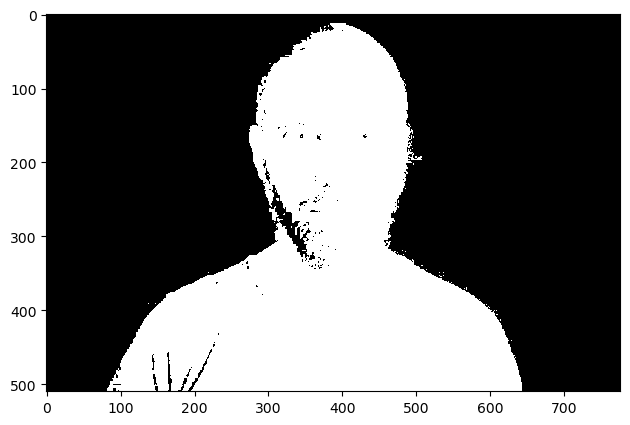

In [11]:
# Exercicse 12: 
in_dir = "./data/"
im_name = "dark_background.png"

# Read the image.
im_gray = io.imread(in_dir + im_name, as_gray=True)
im_byte = img_as_ubyte(im_gray)

io.imshow(threshold_image(im_byte, 5))
io.show()


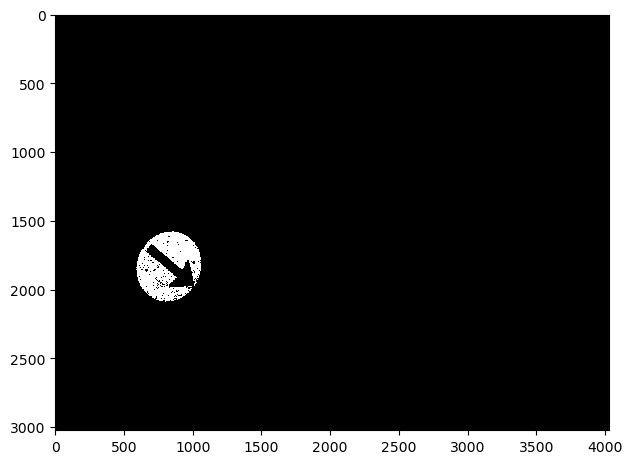

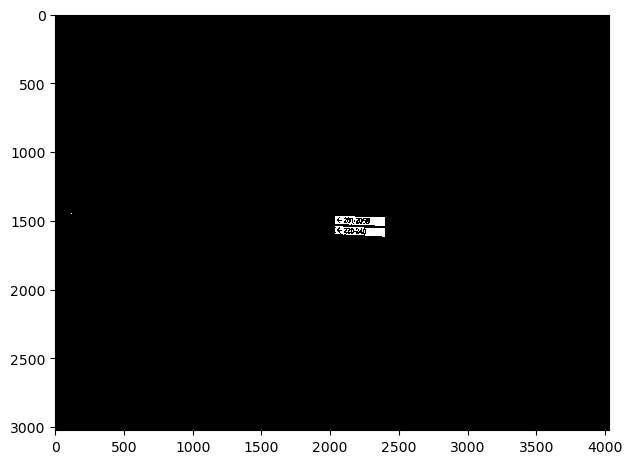

In [12]:
# Exercicse 13 & 14: 
in_dir = "./data/"
im_name = "DTUSigns2.jpg"

# Read the image.
im_signs = io.imread(in_dir + im_name)

def detect_dtu_signs(in_img, color):
    r_comp = in_img[:, :, 0]
    g_comp = in_img[:, :, 1]
    b_comp = in_img[:, :, 2]
    
    if color == "red":
        segm = (r_comp > 150) & (r_comp < 255) & (g_comp < 70) & (b_comp < 70)

    if color == "blue":
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    return segm

#168, 55, 59

io.imshow(detect_dtu_signs(im_signs, "blue"))
io.show()
io.imshow(detect_dtu_signs(im_signs, "red"))
io.show()

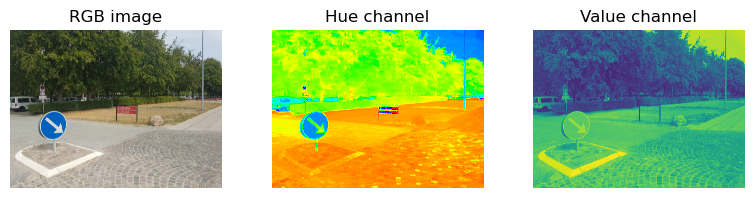

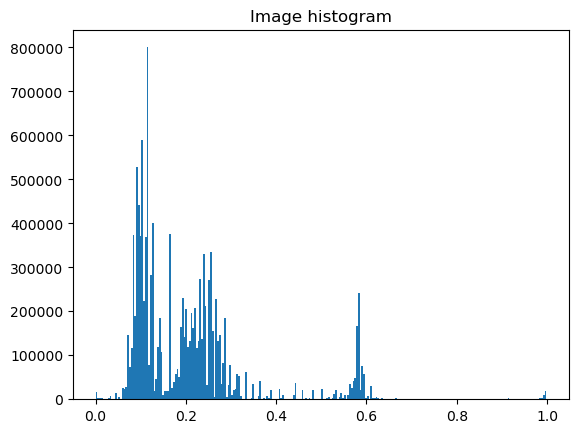

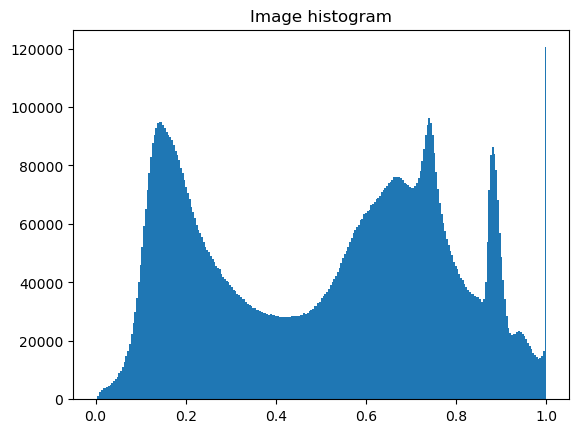

In [13]:
# Exercise 15
hsv_img = color.rgb2hsv(im_signs)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_signs)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
io.show()


plt.hist(hue_img.ravel(), bins=256)
plt.title('Image histogram')
io.show()

plt.hist(value_img.ravel(), bins=256)
plt.title('Image histogram')
io.show()

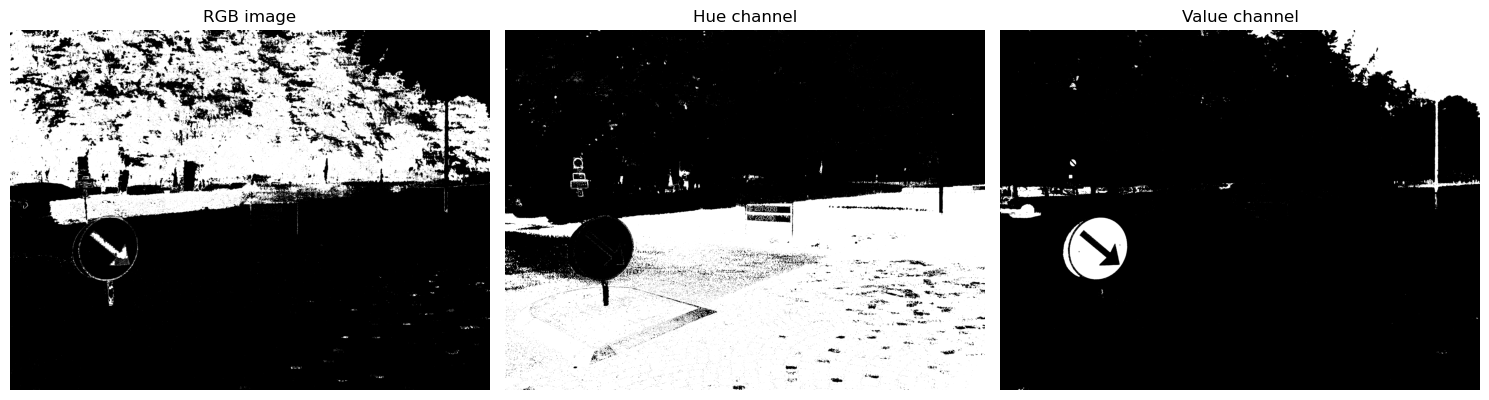

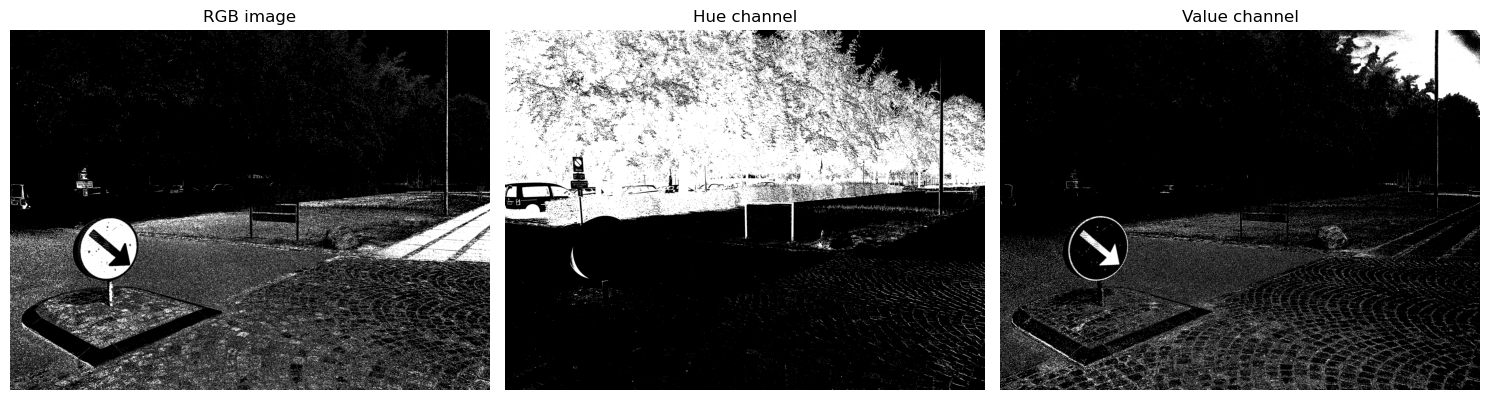

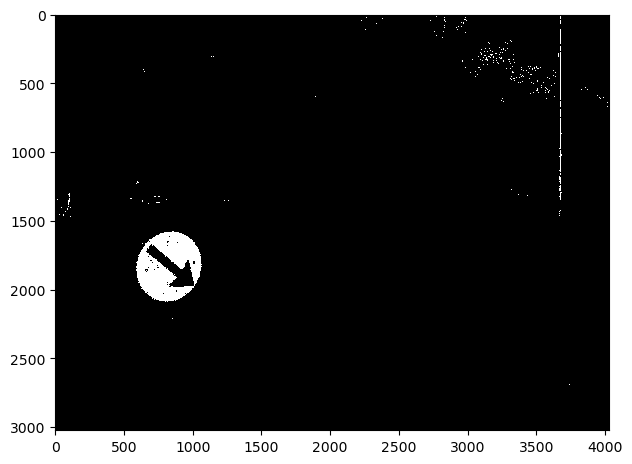

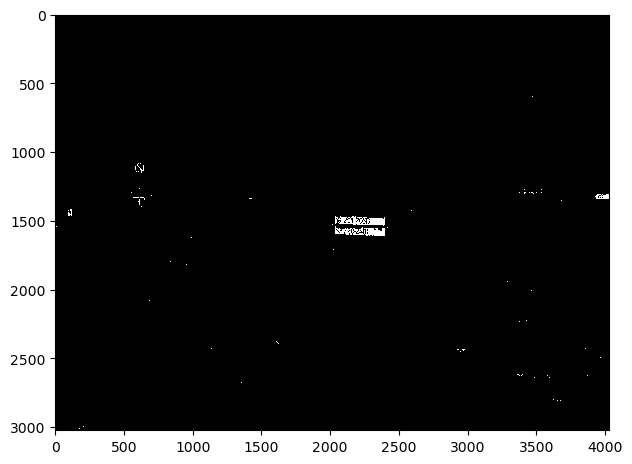

In [14]:
# Exercise 15
hsv_img = color.rgb2hsv(im_signs)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

hue_thres1 = (hue_img > 0.2) & (hue_img < 0.3)
hue_thres2 = (hue_img < 0.15)
hue_thres3 = (hue_img > 0.5) & (hue_img < 0.7)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 15))
ax0.imshow(hue_thres1, cmap='gray')
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_thres2, cmap='gray')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(hue_thres3, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
io.show()

val_thres1 = (value_img > 0.7) & (value_img < 0.8)
val_thres2 = (value_img < 0.4)
val_thres3 = (value_img > 0.8) & (value_img < 0.9)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 15))
ax0.imshow(val_thres1, cmap='gray')
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(val_thres2, cmap='gray')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(val_thres3, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
io.show()

blue_seg = hue_thres3 & val_thres1
io.imshow(blue_seg)
io.show()

red_seg = (hue_img < 1) & (hue_img > 0.9)
io.imshow(red_seg)
io.show()


In [16]:
# Exercise 16

def show_in_moved_window(win_name, img, x, y):
    """
    Show an image in a window, where the position of the window can be given
    """
    cv2.namedWindow(win_name)
    cv2.moveWindow(win_name, x, y)
    cv2.imshow(win_name, img)

def process_gray_image(img):
    """
    Do a simple processing of an input gray scale image and return the processed image.
    # https://scikit-image.org/docs/stable/user_guide/data_types.html#image-processing-pipeline
    """
    img_float = img_as_float(img)
    #img_proc = 1 - img_float
    thresh = img_float > 0.5
    #return img_as_ubyte(img_proc)
    return img_as_ubyte(thresh)

def process_rgb_image(img):
    """
    Simple processing of a color (RGB) image
    """
    # Copy the image information so we do not change the original image
    proc_img = img.copy()
    r_comp = proc_img[:, :, 0]
    proc_img[:, :, 0] = 1 - r_comp
    return proc_img



def capture_from_camera_and_show_images():
    print("Starting image capture")

    print("Opening connection to camera")
    url = 0
    use_droid_cam = False
    if use_droid_cam:
        url = "http://192.168.1.120:4747/video"
    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    print("Starting camera loop")
    # To keep track of frames per second using a high-performance counter
    old_time = time.perf_counter()
    fps = 0
    stop = False
    process_rgb = False
    while not stop:
        ret, new_frame = cap.read()
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Change from OpenCV BGR to scikit image RGB
        new_image = new_frame[:, :, ::-1]
        new_image_gray = color.rgb2gray(new_image)
        if process_rgb:
            proc_img = process_rgb_image(new_image)
            # convert back to OpenCV BGR to show it
            proc_img = proc_img[:, :, ::-1]
        else:
            proc_img = process_gray_image(new_image_gray)

        # update FPS - but do it slowly to avoid fast changing number
        new_time = time.perf_counter()
        time_dif = new_time - old_time
        old_time = new_time
        fps = fps * 0.95 + 0.05 * 1 / time_dif

        # Put the FPS on the new_frame
        str_out = f"fps: {int(fps)}"
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(new_frame, str_out, (100, 100), font, 1, 255, 1)

        # Display the resulting frame
        show_in_moved_window('Input', new_frame, 0, 10)
        show_in_moved_window('Input gray', new_image_gray, 600, 10)
        show_in_moved_window('Processed image', proc_img, 1200, 10)

        if cv2.waitKey(1) == ord('q'):
            stop = True

    print("Stopping image loop")
    cap.release()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    capture_from_camera_and_show_images()
    
    


Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop
